## 1. Импорт библиотек и подготовка датафрейма:

In [1]:
# Библиотеки
import pandas as pd
import random
import string
from faker import Faker
import seaborn as sns
import matplotlib.pyplot as plt

# Стиль графиков
sns.set(rc = {'figure.figsize':(16,10)}, style = "whitegrid")

In [2]:
# Функция для генерации случайной даты
def random_date(start_year, end_year):
    start = pd.Timestamp(start_year, 1, 1)
    end = pd.Timestamp(end_year, 12, 31)
    return start + pd.to_timedelta(random.randint(0, int((end - start).total_seconds())), unit='s')

# Функция для генерации случайного времени от 10 утра до 22 вечера
def random_time():
    start_time = pd.Timestamp(2020, 1, 1, 10)  # 10 утра
    end_time = pd.Timestamp(2020, 1, 1, 22)  # 22 вечера
    return start_time + pd.to_timedelta(random.randint(0, int((end_time - start_time).total_seconds())), unit='s')

# Инициализация Faker
fake = Faker()

# Функция для генерации случайного названия товара
def random_product_name():
    product_types = ['Bread', 'Butter', 'Milk', 'Cheese', 'Eggs', 'Meat', 'Fish', 'Grain', 'Flour', 'Sugar',
                    'Apple', 'Banana', 'Orange', 'Carrot', 'Potato', 'Tomato', 'Onion', 'Garlic', 'Cucumber',
                    'Pepper', 'Broccoli', 'Cauliflower', 'Spinach', 'Lettuce', 'Corn', 'Beans', 'Rice', 'Coffee',
                    'Tea', 'Water']
    product_type = random.choice(product_types)
    product_brand = fake.word().title().replace(' ', '_')
    return f"{product_type}_{product_brand}"

# Ввод пользователем границ дат и границ цен
start_year = int(input("Введите начальный год: "))
end_year = int(input("Введите конечный год: "))
min_price = int(input("Введите минимальную цену: "))
max_price = int(input("Введите максимальную цену: "))
num_products = int(input("Введите количество товаров: "))

# Вычисление количества дней между заданными годами
num_days = ((pd.Timestamp(end_year, 12, 31) - pd.Timestamp(start_year, 1, 1)).days + 1) * 35

# Генерация данных
data = {
    'product': [random_product_name() for _ in range(num_products)],
    'price': [random.randint(min_price, max_price) for _ in range(num_products)]  # Используем randint для целых чисел
}

# Создание датафрейма
df = pd.DataFrame(data)

# Генерация случайных дат и времен для продаж
sales_data = []
for year in range(start_year, end_year + 1):
    for product in df.itertuples():
        num_sales = random.randint(0, num_days)  # Количество продаж от 0 до количества дней
        for _ in range(num_sales):
            sale_date = random_date(year, year)  # Устанавливаем год продажи равным текущему году
            sale_time = random_time()
            sales_data.append((product.product,
                               product.price,
                               sale_date.replace(hour=sale_time.hour,
                                                 minute=sale_time.minute,
                                                 second=sale_time.second)))
    # Увеличение цены на определенный процент каждый год
    df['price'] = (df['price'] * (1 + random.randint(2, 25) / 100)).round().astype(int)

# Создание датафрейма продаж
df = pd.DataFrame(sales_data, columns=['product', 'price', 'date_of_sale'])

# Выводим результаты
df

Введите начальный год:  2020
Введите конечный год:  2023
Введите минимальную цену:  50
Введите максимальную цену:  200
Введите количество товаров:  25


,product,price,date_of_sale
0,Bread_Quickly,115,2020-12-09 17:57:04
1,Bread_Quickly,115,2020-06-28 17:17:28
2,Bread_Quickly,115,2020-02-09 10:29:47
3,Bread_Quickly,115,2020-04-29 15:56:52
4,Bread_Quickly,115,2020-03-22 15:42:39
...,...,...,...
2460920,Butter_Subject,305,2023-08-07 13:06:18
2460921,Butter_Subject,305,2023-01-29 18:18:47
2460922,Butter_Subject,305,2023-05-24 14:22:48
2460923,Butter_Subject,305,2023-08-19 10:53:26


## 2. Задания к датафрейму:

1) Сгруппируйте данные по типу товара и найдите общее количество проданных единиц и общую сумму продаж для каждого типа товара
2) Рассчитайте среднюю цену каждого товара за каждый год. Представьте результаты в виде таблицы, где строки это товары, а столбцы это года, значения это средние цены
3) Постройте график, показывающий изменение суммарного объема продаж и прибыли по месяцам за все годы
4) Найдите месяц с наибольшей выручкой (суммой продаж) для каждого года
5) Определите топ-5 самых продаваемых товаров и их общее количество проданных единиц
6) Разбейте данные о продажах на три временных интервала: утро (10:00-15:00), день (15:00-18:00) и вечер (18:00-22:00) и определите, в какое время суток происходит больше всего продаж
7) Самый продаваемый продукт по времени суток
8) Найдите сезонность продаж всех товаров (зима, весна, лето и осень)
9) Найдите сезонность продаж самого продаваемого товара (зима, весна, лето и осень)
10) Рассчитайте количество продаж в выходные дни (суббота и воскресенье) и сравните его с количеством продаж в будние дни

#### 1. Сгруппируйте данные по типу товара и найдите общее количество проданных единиц и общую сумму продаж для каждого типа товара

In [3]:
# Создание датафрейма
grouped_df = df.groupby('product').agg(
             total_units_sold=('price', 'count'),
             total_sales=('price', 'sum')).reset_index()

# Выводим результаты
grouped_df

,product,total_units_sold,total_sales
0,Banana_Either,110334,8313777
1,Banana_Remember,84079,13043234
2,Bread_Quickly,93860,13986308
3,Broccoli_Term,94767,18820346
4,Broccoli_Town,111327,11595971
5,Butter_Different,125563,10374503
6,Butter_Subject,101758,24188638
7,Carrot_Tax,88945,12643193
8,Cauliflower_Happy,76916,16504168
9,Cucumber_Item,100887,23449767


#### 2. Рассчитайте среднюю цену каждого товара за каждый год. Представьте результаты в виде таблицы, где строки это товары, а столбцы это года, значения это средние цены

In [4]:
# Извлекаем год из столбца 'date_of_sale'
year_df = df
year_df['date_of_sale'] = pd.to_datetime(year_df['date_of_sale'])
year_df['year'] = year_df['date_of_sale'].dt.year

# Создаем pivot table с средней ценой товаров за каждый год
pivot_table = year_df.pivot_table(values='price', index='product', columns='year', aggfunc='mean')

# Выводим результаты
pivot_table

year,2020,2021,2022,2023
product,,,,
Banana_Either,64.0,71.0,84.0,98.0
Banana_Remember,134.0,149.0,176.0,206.0
Bread_Quickly,115.0,128.0,151.0,177.0
Broccoli_Term,156.0,173.0,204.0,239.0
Broccoli_Town,89.0,99.0,117.0,137.0
Butter_Different,69.0,77.0,91.0,106.0
Butter_Subject,199.0,221.0,261.0,305.0
Carrot_Tax,113.0,125.0,148.0,173.0
Cauliflower_Happy,160.0,178.0,210.0,246.0


#### 3. Постройте график, показывающий изменение суммарного объема продаж и прибыли по месяцам за все годы

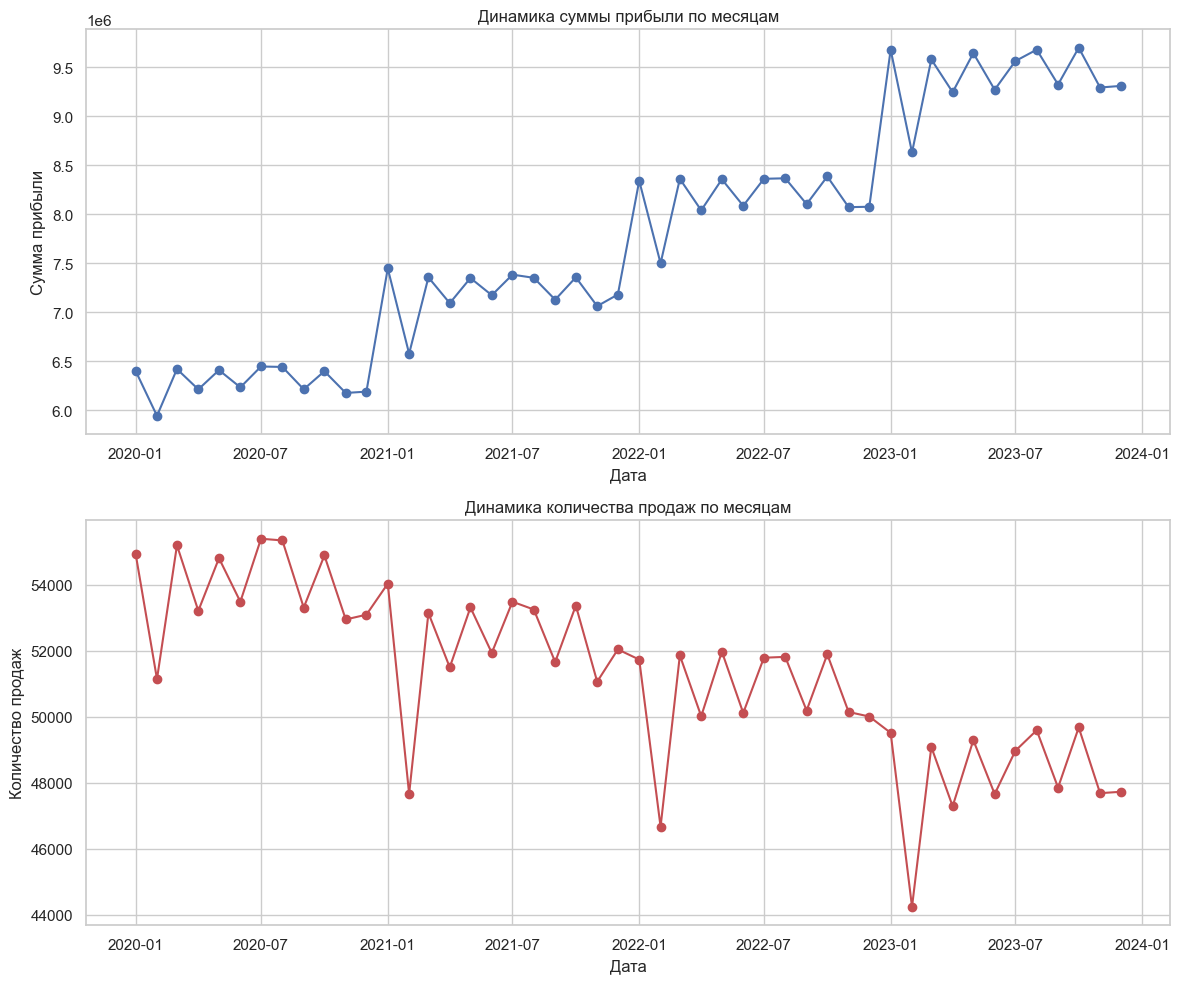

In [5]:
# Копирование датафрейма
monthly_df= df

# Извлекаем год и месяц из столбца 'date_of_sale'
monthly_df['year'] = monthly_df['date_of_sale'].dt.year
monthly_df['month'] = monthly_df['date_of_sale'].dt.month

# Агрегируем данные по месяцам и годам, чтобы получить суммарный объем продаж
monthly_sales = monthly_df.groupby(['year', 'month'])['price'].sum().reset_index()
monthly_sales_count = monthly_df.groupby(['year', 'month'])['price'].count().reset_index()

# Преобразуем год и месяц в один столбец для удобства построения графика
monthly_sales['date'] = pd.to_datetime(monthly_sales['year'].astype(str) + '-' + monthly_sales['month'].astype(str))
monthly_sales_count['date'] = pd.to_datetime(monthly_sales['year'].astype(str) + '-' + monthly_sales['month'].astype(str))

# Устанавливаем дату в качестве индекса для удобства построения графика
monthly_sales.set_index('date', inplace=True)
monthly_sales_count.set_index('date', inplace=True)

# Создаем фигуру и оси для двух графиков
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Первый график - динамика суммы прибыли по месяцам
ax1.plot(monthly_sales.index, monthly_sales['price'], marker="o", color='b')
ax1.set_title('Динамика суммы прибыли по месяцам')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Сумма прибыли')
ax1.grid(True)

# Второй график - динамика количества продаж по месяцам
ax2.plot(monthly_sales_count.index, monthly_sales_count['price'], marker="o", color='r')
ax2.set_title('Динамика количества продаж по месяцам')
ax2.set_xlabel('Дата')
ax2.set_ylabel('Количество продаж')
ax2.grid(True)

# Автоматическое выравнивание макета графика
plt.tight_layout()

# Показываем графики
plt.show()

#### 4. Найдите месяц с наибольшей выручкой (суммой продаж) для каждого года

In [6]:
# Находим месяц с наибольшей выручкой для каждого года
max_monthly_sales = monthly_sales.loc[monthly_sales.groupby('year')['price'].idxmax()].reset_index()

# Выводим результаты
max_monthly_sales

,date,year,month,price
0,2020-07-01,2020,7,6446438
1,2021-01-01,2021,1,7446830
2,2022-10-01,2022,10,8385308
3,2023-10-01,2023,10,9699227


#### 5. Определите топ-5 самых продаваемых товаров и их общее количество проданных единиц

In [7]:
# Группируем данные по товарам и считаем количество проданных единиц
top_products = df.groupby('product')['price'].count().nlargest(5).reset_index().rename(columns={'price': 'count'})

# Выводим результаты
top_products

,product,count
0,Garlic_Draw,143601
1,Meat_Thing,137568
2,Butter_Different,125563
3,Spinach_Attack,124199
4,Pepper_While,118125


#### 6. Разбейте данные о продажах на три временных интервала: утро (10:00-15:00), день (15:00-18:00) и вечер (18:00-22:00). Определите, в какое время суток происходит больше всего продаж

In [8]:
# Копирование датафрейма
max_sales_df = df.copy()

# Преобразуем столбец 'date_of_sale' в формат datetime, если он еще не в таком формате
max_sales_df['date_of_sale'] = pd.to_datetime(max_sales_df['date_of_sale'])

# Определяем функцию для определения времени суток
def assign_time_of_day(date):
    if (22 <= date.hour < 24) and (0 <= date.hour < 6):
        return 'Night'
    elif 6 <= date.hour < 12:
        return 'Morning'
    elif 12 <= date.hour < 18:
        return 'Day'
    else:
        return 'Evening'

# Применяем функцию для создания нового столбца 'time_of_day'
max_sales_df['time_of_day'] = max_sales_df['date_of_sale'].apply(assign_time_of_day)

# Считаем количество продаж в каждом временном интервале
time_of_day_sales = max_sales_df['time_of_day'].value_counts()

# Находим время суток с наибольшим количеством продаж
max_sales_time_of_day = time_of_day_sales.idxmax()

# Переводим в датафрейм
time_of_day_sales_df = time_of_day_sales.reset_index()

# Выводим результаты
print(f"Время суток в котором больше всего продаж - {max_sales_time_of_day}\n")
time_of_day_sales_df

Время суток в котором больше всего продаж - Day



,time_of_day,count
0,Day,1230699
1,Evening,820284
2,Morning,409942


#### 7. Самый продаваемый продукт по времени суток

In [9]:
# Группируем по продукту и времени суток, считаем количество продаж и находим самый продаваемый продукт в каждое время суток
most_sold_by_time_of_day = (
    max_sales_df.groupby(['time_of_day', 'product'])
    .size()
    .reset_index(name='count')
    .sort_values(by=['time_of_day', 'count'], ascending=[True, False])
    .groupby('time_of_day')
    .head(1)
)

# Выводим результаты
most_sold_by_time_of_day

,time_of_day,product,count
14,Day,Garlic_Draw,71465
39,Evening,Garlic_Draw,48075
64,Morning,Garlic_Draw,24061


#### 8. Найдите сезонность продаж суммы всех товаров (зима, весна, лето и осень)

In [10]:
# Копирование датафрейма
season_sales_df = df.copy()

# Преобразуем столбец 'date_of_sale' в формат datetime, если он еще не в таком формате
season_sales_df['date_of_sale'] = pd.to_datetime(season_sales_df['date_of_sale'])

# Определяем функцию для определения сезона
def assign_season(date):
    if date.month in [12, 1, 2]:
        return 'Winter'
    elif date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Применяем функцию для создания нового столбца 'season'
season_sales_df['season'] = season_sales_df['date_of_sale'].apply(assign_season)

# Считаем количество продаж в каждом сезоне
season_sales = season_sales_df['season'].value_counts().reset_index()

# Выводим результаты
season_sales

,season,count
0,Summer,622820
1,Spring,620664
2,Autumn,614660
3,Winter,602781


#### 9. Найдите сезонность продаж самого продаваемого товара (зима, весна, лето и осень)

In [11]:
# Выбираем продукт для анализа, который имеет наибольшее количество продаж
product_to_analyze = top_products.iloc[0]['product']

# Фильтруем датафрейм продаж по выбранному продукту
product_sales = season_sales_df[season_sales_df['product'] == product_to_analyze]

# Подсчитываем количество продаж выбранного продукта по сезонам
product_season_sales = product_sales['season'].value_counts().reset_index()

top_season = product_season_sales.iloc[0]['season']

# Выводим на экран информацию о продажах выбранного продукта по сезонам
print(f"Самый продаваемый сезон для {product_to_analyze} это - {top_season}\n")
product_season_sales

Самый продаваемый сезон для Garlic_Draw это - Spring



,season,count
0,Spring,36331
1,Summer,36256
2,Autumn,36012
3,Winter,35002


#### 10. Рассчитайте количество продаж в выходные дни (суббота и воскресенье) и сравните его с количеством продаж в будние дни

In [12]:
# Копирование датафрейма
weekend_df = df.copy()

# Преобразуем столбец 'date_of_sale' в формат datetime, если он еще не в таком формате
weekend_df['date_of_sale'] = pd.to_datetime(weekend_df['date_of_sale'])

# Определяем функцию для определения дня недели
def is_weekend(date):
    return date.weekday() >= 5  # 5 и 6 соответствуют субботе и воскресенью

# Применяем функцию для создания нового столбца 'is_weekend'
weekend_df['is_weekend'] = weekend_df['date_of_sale'].apply(is_weekend)

# Считаем количество продаж в будние дни и выходные дни
weekday_sales = weekend_df[weekend_df['is_weekend'] == False].shape[0]
weekend_sales = weekend_df[weekend_df['is_weekend'] == True].shape[0]

# Выводим результаты
print(f"{weekday_sales} - количество продаж в рабочие дни.")
print(f"{weekend_sales} - количество продаж в выходные.")

# Сравниваем количество продаж в будние дни и выходные дни
if weekday_sales > weekend_sales:
    print("Больше продаж сделано в рабочие дни.")
elif weekday_sales < weekend_sales:
    print("Больше продаж сделано в выходные.")
else:
    print("Одинаковое число продаж между рабочими днями и выходными.")

1758742 - количество продаж в рабочие дни.
702183 - количество продаж в выходные.
Больше продаж сделано в рабочие дни.
